In [1]:
import os 
import cv2
import random
import argparse
import numpy as np 
import string
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.layers import Flatten, Dense, Layer, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import Model, Input 
from tensorflow.keras.utils import plot_model
from sklearn.model_selection import train_test_split
from utils import *
import matplotlib.pyplot as plt

In [2]:
datapath= "../input/captcha-version-2-images/samples/samples"
symbols = string.ascii_lowercase + '0123456789'
len_symbols = len(string.ascii_lowercase + "0123456789")

In [3]:
def myModel():
    
    inputs = Input(shape=(50,200,1) , name='image')
    x= Conv2D(16, (3,3),padding='same',activation='relu')(inputs)
    x = MaxPooling2D((2,2) , padding='same')(x)
    x= Conv2D(32, (3,3),padding='same',activation='relu')(x)
    x = MaxPooling2D((2,2) , padding='same')(x)
    x= Conv2D(32, (3,3),padding='same',activation='relu')(x)
    x = MaxPooling2D((2,2) , padding='same')(x)
    x = BatchNormalization()(x)
    out_flat= Flatten()(x)
    
    #char-1
    dense_1 = Dense(64 , activation='relu')(out_flat)
    dropout_1= Dropout(0.5)(dense_1)
    out_1 = Dense(len_symbols , activation='sigmoid' , name='char_1')(dropout_1)
    
    #char-2
    dense_2 = Dense(64 , activation='relu')(out_flat)
    dropout_2= Dropout(0.5)(dense_2)
    out_2 = Dense(len_symbols , activation='sigmoid' , name='char_2')(dropout_2)
    
    #char-3
    dense_3 = Dense(64 , activation='relu')(out_flat)
    dropout_3= Dropout(0.5)(dense_3)
    out_3 = Dense(len_symbols , activation='sigmoid' , name='char_3')(dropout_3)
    
    #char-4
    dense_4 = Dense(64 , activation='relu')(out_flat)
    dropout_4= Dropout(0.5)(dense_4)
    out_4 = Dense(len_symbols , activation='sigmoid' , name='char_4')(dropout_4)
    
    #char-5
    dense_5 = Dense(64 , activation='relu')(out_flat)
    dropout_5= Dropout(0.5)(dense_5)
    out_5 = Dense(len_symbols , activation='sigmoid' , name='char_5')(dropout_5)
    
    model_out = Model(inputs=inputs , outputs=[out_1 , out_2 , out_3 , out_4 , out_5])
    
    return model_out
    

In [4]:
model = myModel()

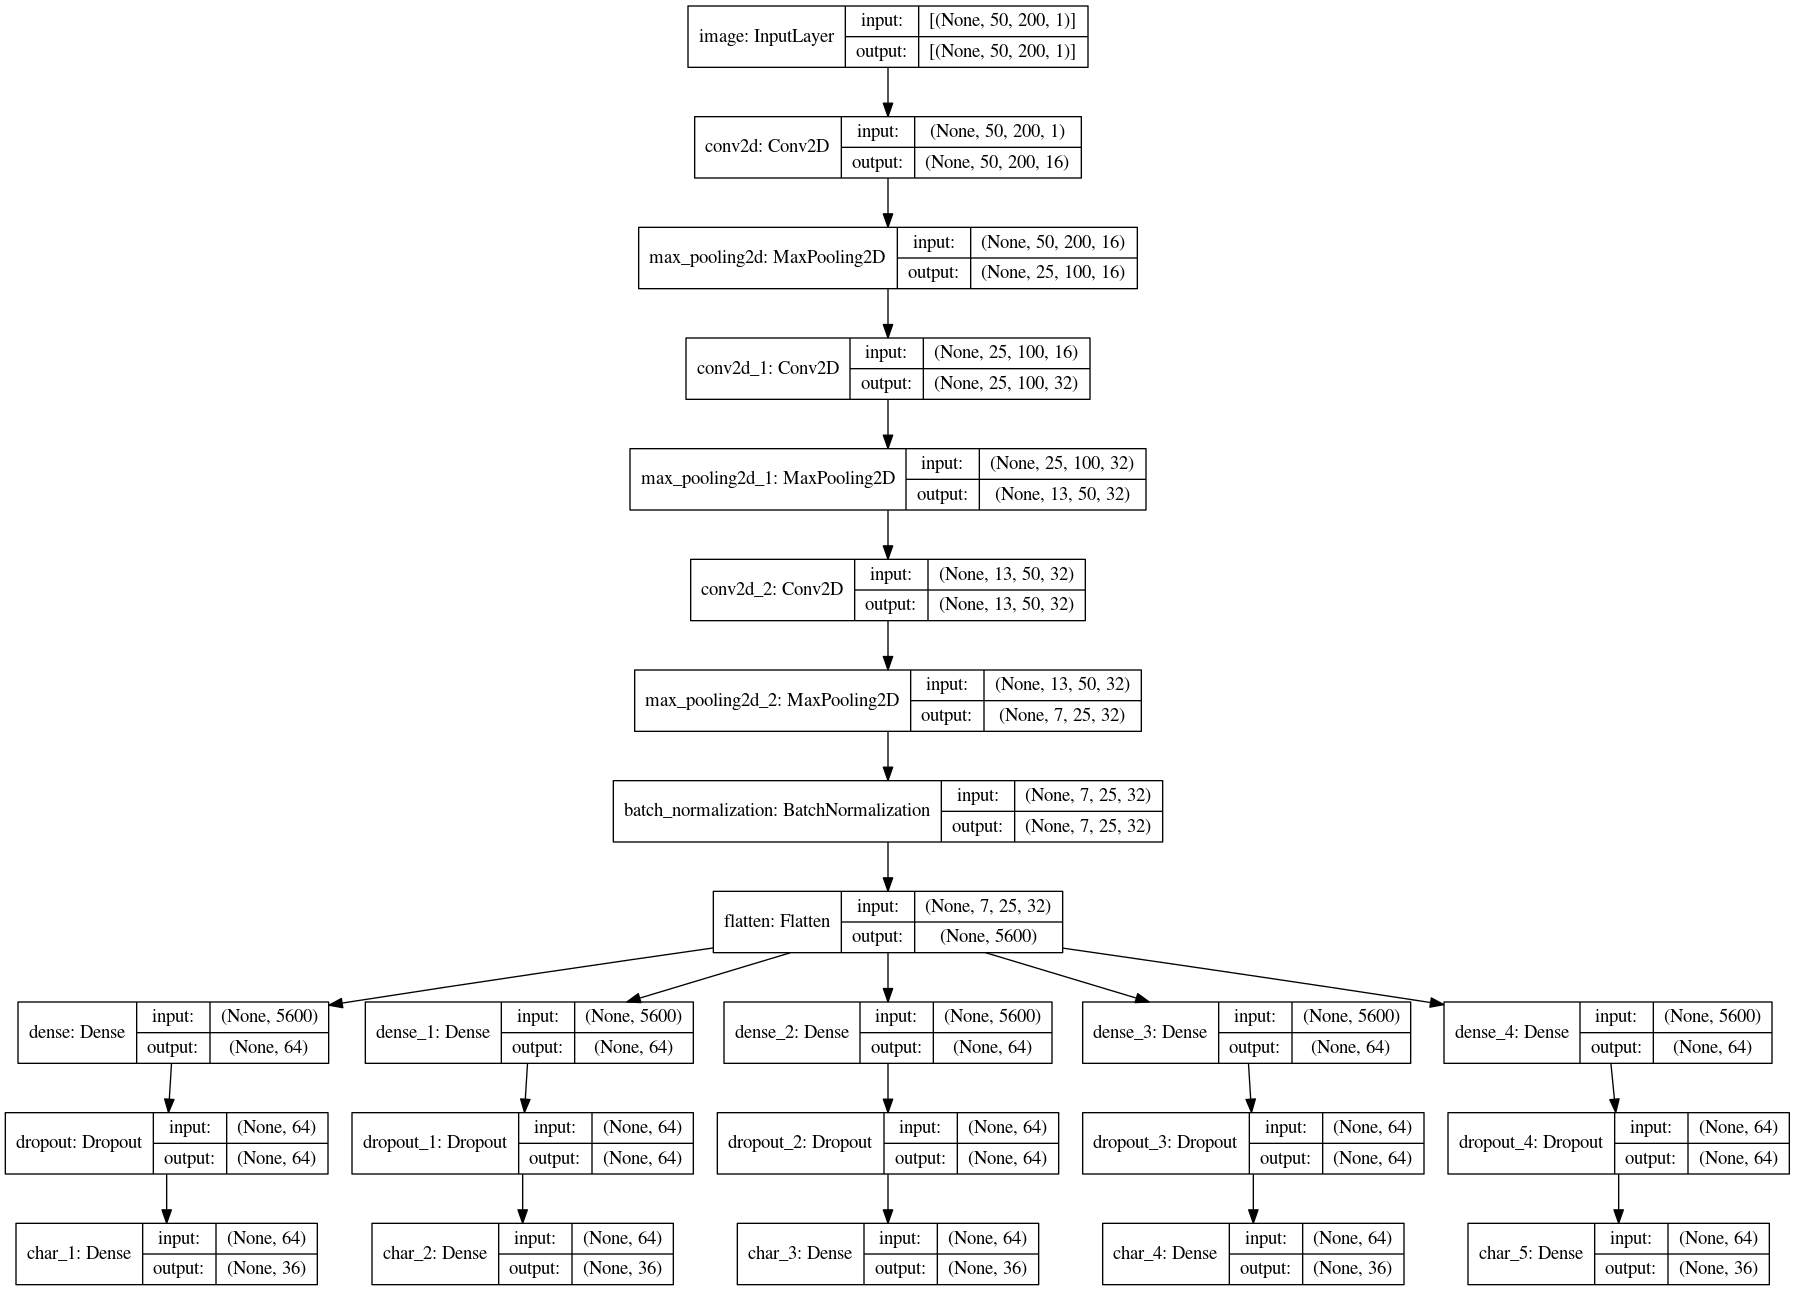

In [5]:
plot_model(model , 'captcha_predictor.png' , show_shapes=True)

In [6]:
model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=1e-3), metrics=["accuracy"])

In [7]:
def preprocessing(path):


	print("[INFO] Processing Images.......")
	n_samples= len(os.listdir(path))
	

	# variables for data and labels 
	X = np.zeros((n_samples , 50 , 200 ,1 ))  # (samples , height , width , channel)
	y = np.zeros((n_samples,5, 36 ))       #(samples , captcha characters , ascii char + numbers)

	for i , image in enumerate(os.listdir(path)):
		img = cv2.imread(os.path.join(path, image) , cv2.IMREAD_GRAYSCALE)

		targets = image.split('.')[0]

		if len(targets)<6:

			img = img/255.0
			img = np.reshape(img , (50,200,1))

			#find the char and one hot encode it to the target
			targ = np.zeros((5,36))

			for l , char in enumerate(targets):

				idx = symbols.find(char)
				targ[l , idx] = 1

			X[i] = img
			y[i,: ,:] = targ

	print("[INFO] Processing Finishes.....")

	return X,y

In [8]:
X, y = preprocessing(datapath)

[INFO] Processing Images.......
[INFO] Processing Finishes.....


In [9]:
trainX , testX , trainY , testY = train_test_split(X, y , test_size=0.2 , random_state=42)

In [10]:
#target values
labels = {'char_1': trainY[:,0,:], 
         'char_2': trainY[:,1,:],
         'char_3': trainY[:,2,:],
         'char_4': trainY[:,3,:],
         'char_5': trainY[:,4,:]}

test_labels = {'char_1': testY[:,0,:], 
         'char_2': testY[:,1,:],
         'char_3': testY[:,2,:],
         'char_4': testY[:,3,:],
         'char_5': testY[:,4,:]}

In [11]:
history = model.fit(trainX ,labels , epochs=30 , batch_size=64 , validation_split=0.2)

Train on 684 samples, validate on 172 samples
Epoch 1/30
684/684 [==============================] - 5s 7ms/sample - loss: 17.4888 - char_1_loss: 3.4298 - char_2_loss: 3.5505 - char_3_loss: 3.4132 - char_4_loss: 3.5283 - char_5_loss: 3.5545 - char_1_acc: 0.0424 - char_2_acc: 0.0497 - char_3_acc: 0.0453 - char_4_acc: 0.0351 - char_5_acc: 0.0453 - val_loss: 17.7997 - val_char_1_loss: 3.5558 - val_char_2_loss: 3.5639 - val_char_3_loss: 3.5434 - val_char_4_loss: 3.5668 - val_char_5_loss: 3.5696 - val_char_1_acc: 0.0407 - val_char_2_acc: 0.0407 - val_char_3_acc: 0.0640 - val_char_4_acc: 0.0523 - val_char_5_acc: 0.0465
Epoch 2/30
684/684 [==============================] - 3s 5ms/sample - loss: 16.4510 - char_1_loss: 3.2569 - char_2_loss: 3.2858 - char_3_loss: 3.2341 - char_4_loss: 3.2921 - char_5_loss: 3.3682 - char_1_acc: 0.0424 - char_2_acc: 0.0629 - char_3_acc: 0.0760 - char_4_acc: 0.0716 - char_5_acc: 0.0863 - val_loss: 17.6621 - val_char_1_loss: 3.5270 - val_char_2_loss: 3.5419 - val_cha

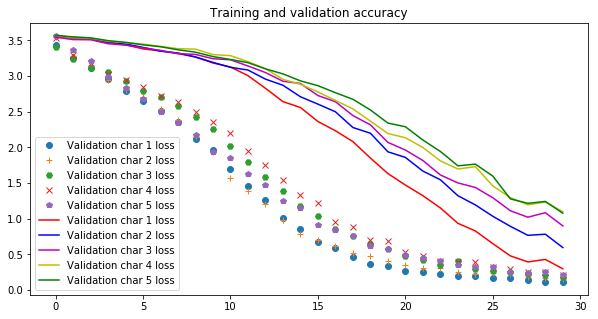

In [12]:
val_char_1_loss = history.history['val_char_1_loss']
val_char_2_loss = history.history['val_char_2_loss']
val_char_3_loss = history.history['val_char_3_loss']
val_char_4_loss = history.history['val_char_4_loss']
val_char_5_loss = history.history['val_char_5_loss']

char_1_loss = history.history['char_1_loss']
char_2_loss = history.history['char_2_loss']
char_3_loss = history.history['char_3_loss']
char_4_loss = history.history['char_4_loss']
char_5_loss = history.history['char_5_loss']

 
epochs = range(len(val_char_1_loss))
plt.figure(figsize=(10,5))
plt.plot(epochs, char_1_loss, 'o', label='Validation char 1 loss')
plt.plot(epochs, char_2_loss, '+', label='Validation char 2 loss')
plt.plot(epochs, char_3_loss, 'H', label='Validation char 3 loss')
plt.plot(epochs, char_4_loss, 'x', label='Validation char 4 loss')
plt.plot(epochs, char_5_loss, 'p', label='Validation char 5 loss')
plt.plot(epochs, val_char_1_loss, 'r', label='Validation char 1 loss')
plt.plot(epochs, val_char_2_loss, 'b', label='Validation char 2 loss')
plt.plot(epochs, val_char_3_loss, 'm', label='Validation char 3 loss')
plt.plot(epochs, val_char_4_loss, 'y', label='Validation char 4 loss')
plt.plot(epochs, val_char_5_loss, 'g', label='Validation char 5 loss')

plt.title('Training and validation accuracy')
plt.legend()

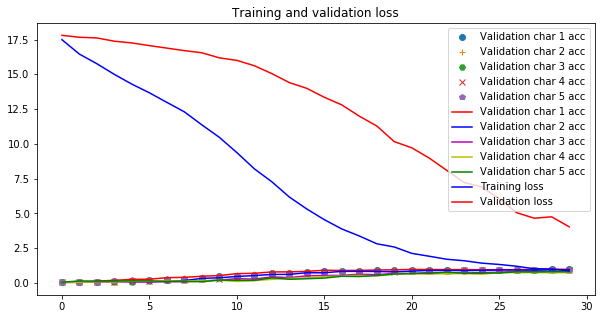

In [13]:
plt.figure(figsize=(10,5))
 
val_char_1_acc = history.history['val_char_1_acc']
val_char_2_acc = history.history['val_char_2_acc']
val_char_3_acc = history.history['val_char_3_acc']
val_char_4_acc = history.history['val_char_4_acc']
val_char_5_acc = history.history['val_char_5_acc']
char_1_acc = history.history['char_1_acc']
char_2_acc = history.history['char_2_acc']
char_3_acc = history.history['char_3_acc']
char_4_acc = history.history['char_4_acc']
char_5_acc = history.history['char_5_acc']

plt.plot(epochs, char_1_acc, 'o', label='Validation char 1 acc')
plt.plot(epochs, char_2_acc, '+', label='Validation char 2 acc')
plt.plot(epochs, char_3_acc, 'H', label='Validation char 3 acc')
plt.plot(epochs, char_4_acc, 'x', label='Validation char 4 acc')
plt.plot(epochs, char_5_acc, 'p', label='Validation char 5 acc')
plt.plot(epochs, val_char_1_acc, 'r', label='Validation char 1 acc')
plt.plot(epochs, val_char_2_acc, 'b', label='Validation char 2 acc')
plt.plot(epochs, val_char_3_acc, 'm', label='Validation char 3 acc')
plt.plot(epochs, val_char_4_acc, 'y', label='Validation char 4 acc')
plt.plot(epochs, val_char_5_acc, 'g', label='Validation char 5 acc')

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
 
plt.show()

In [14]:
score =model.evaluate(testX , test_labels , batch_size=32)

214/214 [==============================] - 0s 1ms/sample - loss: 3.7940 - char_1_loss: 0.3115 - char_2_loss: 0.6038 - char_3_loss: 0.7846 - char_4_loss: 1.0531 - char_5_loss: 1.0588 - char_1_acc: 0.9813 - char_2_acc: 0.8972 - char_3_acc: 0.8692 - char_4_acc: 0.7243 - char_5_acc: 0.7991


In [15]:
print("The score of model:" , score)

The score of model: [3.794020082348975, 0.31149396, 0.6038497, 0.7845643, 1.0531005, 1.0587909, 0.9813084, 0.89719623, 0.86915886, 0.7242991, 0.7990654]


In [16]:
def predictions(image):
    
    image = np.reshape(image , (50,200))
    result = model.predict(np.reshape(image , (1,50,200,1)))
    result = np.reshape(result ,(5,36))
    indexes =[]
    for i in result:
        indexes.append(np.argmax(i))
        
    label=''
    for i in indexes:
        label += symbols[i]
        
    plt.imshow(image)
    plt.title(label)
    

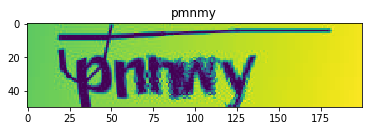

In [17]:
n = random.randint(1,100)
predictions(testX[n])